Velikost dat:
Orders: (99441, 8)
Order items: (112650, 7)
Customers: (99441, 5)
Products: (32951, 9)


Info o DataFrame 'orders':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB

Info o DataFrame 'order_items':


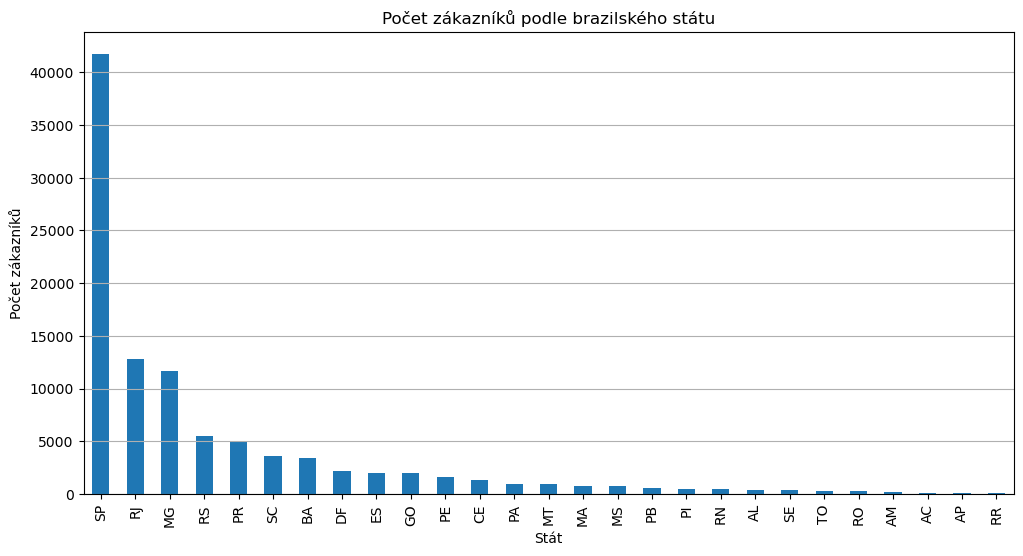

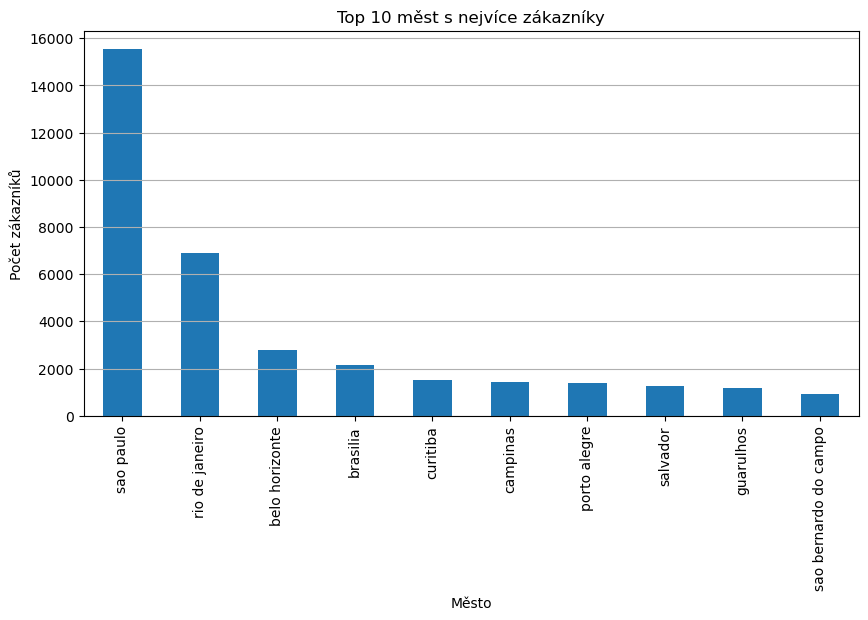

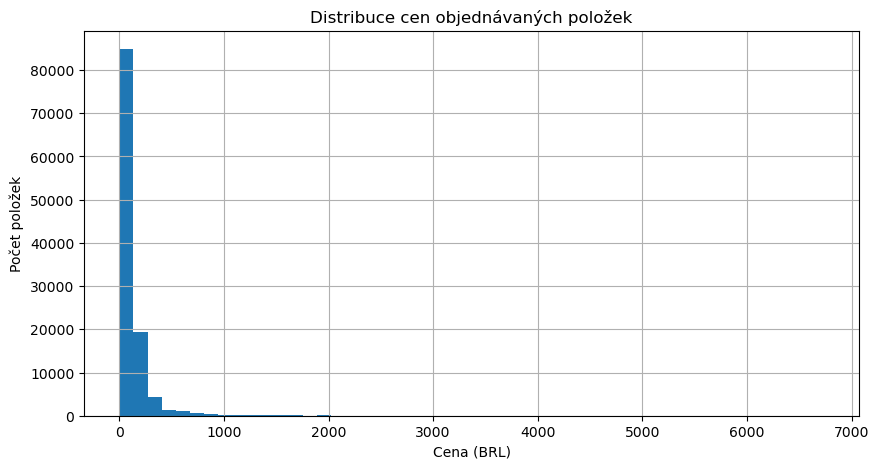

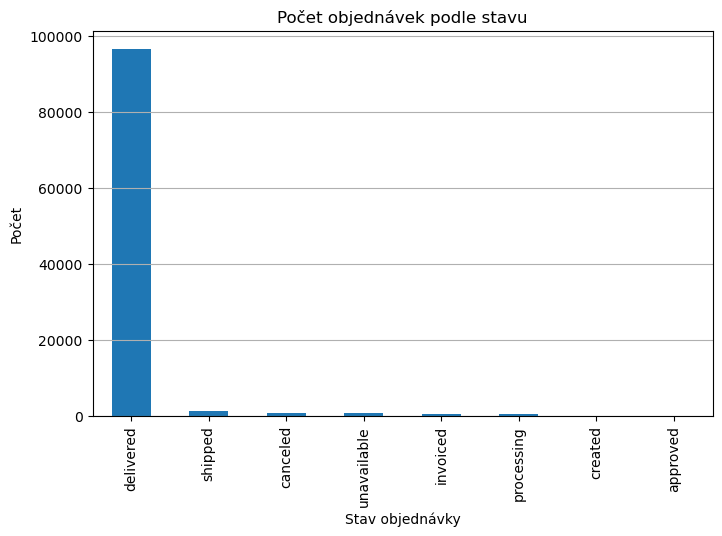

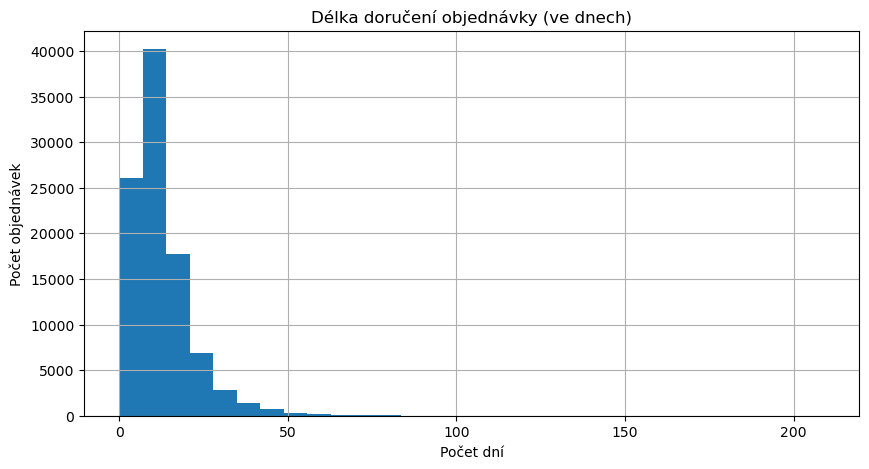

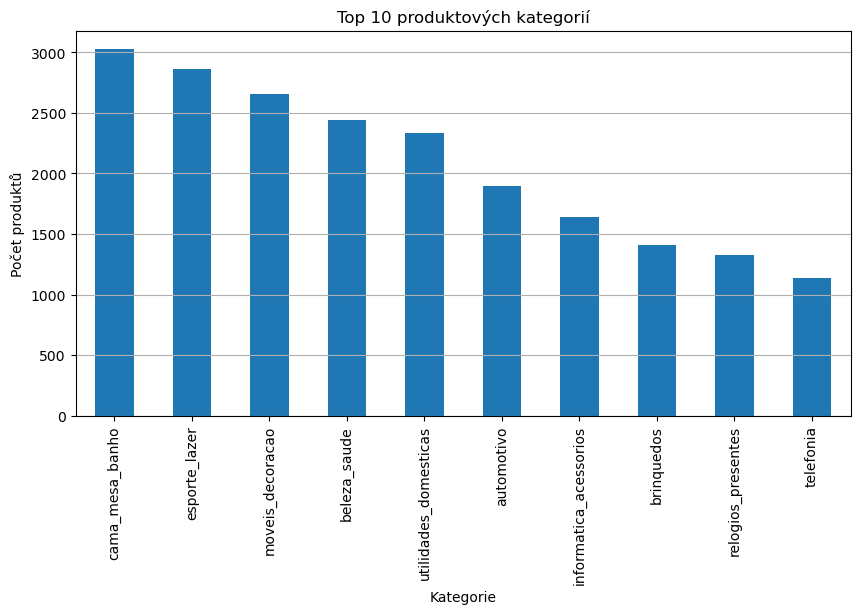

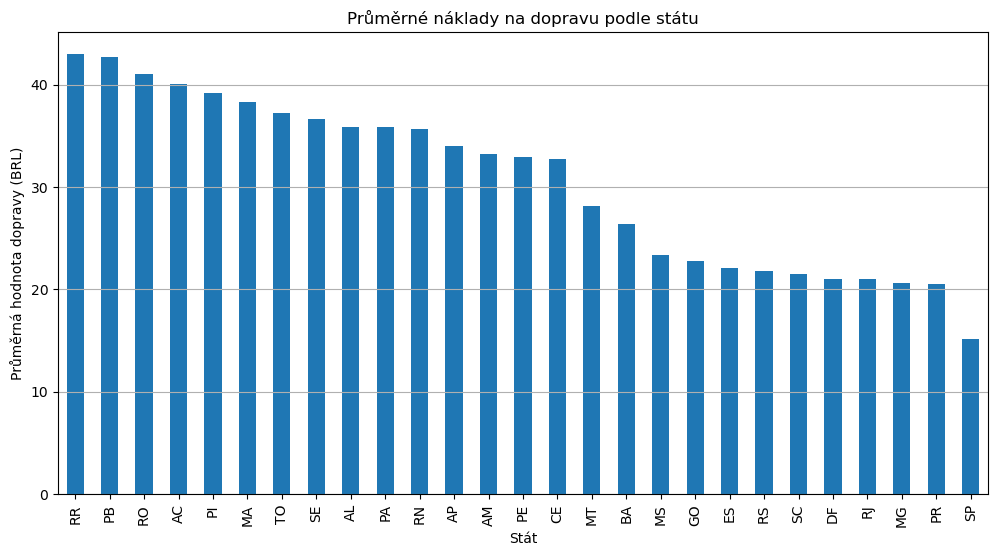

In [1]:
# Základní knihovny
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Načtení CSV souborů
orders = pd.read_csv("../data/olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"])
order_items = pd.read_csv("../data/olist_order_items_dataset.csv", parse_dates=["shipping_limit_date"])
customers = pd.read_csv("../data/olist_customers_dataset.csv")
products = pd.read_csv("../data/olist_products_dataset.csv")

# Základní info o souborech
print("Velikost dat:")
print(f"Orders: {orders.shape}")
print(f"Order items: {order_items.shape}")
print(f"Customers: {customers.shape}")
print(f"Products: {products.shape}\n")

# df info pro jednotlivé soubory
print("\nInfo o DataFrame 'orders':")
orders.info()

print("\nInfo o DataFrame 'order_items':")
order_items.info()

print("\nInfo o DataFrame 'customers':")
customers.info()

print("\nInfo o DataFrame 'products':")
products.info()

# Počet prázdných hodnot
print("\nPočet prázdných hodnot v 'orders':")
print(orders.isnull().sum())

# Základní statistiky pro položky objednávek
print("\nStatistiky ceny a dopravy:")
print(order_items[["price", "freight_value"]].describe())

# Sloučení objednávek a položek
merged = pd.merge(orders, order_items, on="order_id")
merged = pd.merge(merged, customers, on="customer_id")

# Agregace: průměrná celková cena jedné objednávky
avg_price_per_order = merged.groupby("order_id")["price"].sum().mean()
print(f"\nPrůměrná celková cena jedné objednávky: {avg_price_per_order:.2f} BRL")

# Počet zákazníků podle států
customer_states = customers["customer_state"].value_counts()

plt.figure(figsize=(12, 6))
customer_states.plot(kind="bar")
plt.title("Počet zákazníků podle brazilského státu")
plt.xlabel("Stát")
plt.ylabel("Počet zákazníků")
plt.grid(axis='y')
plt.show()

# Top 10 měst s nejvíce zákazníky
top_cities = customers["customer_city"].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_cities.plot(kind="bar")
plt.title("Top 10 měst s nejvíce zákazníky")
plt.xlabel("Město")
plt.ylabel("Počet zákazníků")
plt.grid(axis='y')
plt.show()

# Distribuce cen produktů
plt.figure(figsize=(10, 5))
plt.hist(order_items["price"], bins=50)
plt.title("Distribuce cen objednávaných položek")
plt.xlabel("Cena (BRL)")
plt.ylabel("Počet položek")
plt.grid(True)
plt.show()

# Počet objednávek podle stavu
plt.figure(figsize=(8, 5))
orders["order_status"].value_counts().plot(kind="bar")
plt.title("Počet objednávek podle stavu")
plt.xlabel("Stav objednávky")
plt.ylabel("Počet")
plt.grid(axis='y')
plt.show()

# Délka doručení (ve dnech)
orders["delivery_duration"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days
plt.figure(figsize=(10, 5))
orders["delivery_duration"].dropna().hist(bins=30)
plt.title("Délka doručení objednávky (ve dnech)")
plt.xlabel("Počet dní")
plt.ylabel("Počet objednávek")
plt.grid(True)
plt.show()

# Kategorie produktů - top 10
top_categories = products["product_category_name"].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_categories.plot(kind="bar")
plt.title("Top 10 produktových kategorií")
plt.xlabel("Kategorie")
plt.ylabel("Počet produktů")
plt.grid(axis='y')
plt.show()

# Průměrné náklady na dopravu podle státu
freight_by_state = merged.groupby("customer_state")["freight_value"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
freight_by_state.plot(kind="bar")
plt.title("Průměrné náklady na dopravu podle státu")
plt.xlabel("Stát")
plt.ylabel("Průměrná hodnota dopravy (BRL)")
plt.grid(axis='y')
plt.show()